<a href="https://colab.research.google.com/github/PranavJha2k3/Black_Scholes_Model/blob/main/Black_scholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BLACK-SCHOLES MODEL**


**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = 'AAPL'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

  # Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-22 00:00:00-05:00,163.115956,164.806642,160.317929,162.463425,91162800,0.0,0.0
2022-02-23 00:00:00-05:00,163.669595,164.272704,157.945022,158.261414,90009200,0.0,0.0
2022-02-24 00:00:00-05:00,150.856066,161.010033,150.282617,160.901276,141147500,0.0,0.0
2022-02-25 00:00:00-05:00,161.988829,163.254365,159.052384,162.987427,91974200,0.0,0.0
2022-02-28 00:00:00-05:00,161.217642,163.550977,160.594755,163.254364,95056600,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-13 00:00:00-05:00,185.770004,186.210007,183.509995,185.039993,56529500,0.0,0.0
2024-02-14 00:00:00-05:00,185.320007,185.529999,182.440002,184.149994,54630500,0.0,0.0
2024-02-15 00:00:00-05:00,183.550003,184.490005,181.350006,183.860001,65434500,0.0,0.0


In [ ]:
symbol = 'AAPL'
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options

('2024-02-23',
 '2024-03-01',
 '2024-03-08',
 '2024-03-15',
 '2024-03-22',
 '2024-03-28',
 '2024-04-19',
 '2024-05-17',
 '2024-06-21',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])

In [ ]:
dfo_exp.calls #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240301C00095000,2024-02-12 17:54:50+00:00,95.0,93.48,0.0,0.0,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
1,AAPL240301C00100000,2024-02-05 17:24:01+00:00,100.0,88.30,0.0,0.0,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD
2,AAPL240301C00110000,2024-01-22 14:54:03+00:00,110.0,84.86,0.0,0.0,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
3,AAPL240301C00135000,2024-02-20 18:01:08+00:00,135.0,46.05,0.0,0.0,0.0,0.0,3.0,0,0.000010,True,REGULAR,USD
4,AAPL240301C00140000,2024-02-20 15:14:02+00:00,140.0,40.62,0.0,0.0,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD
5,AAPL240301C00145000,2024-02-16 20:12:12+00:00,145.0,37.45,0.0,0.0,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD
6,AAPL240301C00150000,2024-02-20 15:29:18+00:00,150.0,30.80,0.0,0.0,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD
7,AAPL240301C00155000,2024-02-16 20:41:49+00:00,155.0,27.39,0.0,0.0,0.0,0.0,46.0,0,0.000010,True,REGULAR,USD
8,AAPL240301C00160000,2024-02-20 16:31:25+00:00,160.0,21.85,0.0,0.0,0.0,0.0,5.0,0,0.000010,True,REGULAR,USD
9,AAPL240301C00162500,2024-02-20 15:43:33+00:00,162.5,17.95,0.0,0.0,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:


*   Calculating daily logarithmic returns.
*   Then calculating its standard deviation to get daily volatility
*   Then multiplying it by sqrt(252) as there are 252 trading days in a year.


In [ ]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close']) - np.log(df['Close'].shift(1))
    log_return = log_return[1:]
    daily_vol = log_return.std()
    vol = daily_vol*(252**0.5)

    return vol

In [ ]:
vol = annual_vol(df)
vol

0.2851147719335755

# **BLACK-SCHOLES MODEL**


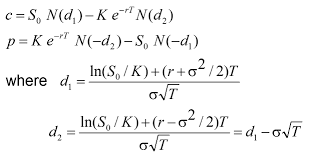

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [ ]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    Calculation of options price with Black_Scholes_Model

    Parameters
    ----------
    S : float
        The price of the underlying asset

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """


    d1 = (np.log(S/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if option == 'call':
        premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
    if option == 'put':
        premium =  K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)

    return premium

In [ ]:
N = 100
T = 9/365
t = T/N

In [ ]:
#r = risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head(50)

,th_call
95.0,8.656000e+01
100.0,8.156001e+01
110.0,7.156001e+01
135.0,4.656001e+01
140.0,4.156001e+01
145.0,3.656001e+01
150.0,3.156002e+01
155.0,2.656039e+01
160.0,2.156537e+01
162.5,1.907654e+01


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
95.0,93.48
100.0,88.30
110.0,84.86
135.0,46.05
140.0,40.62


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
95.0,86.560005,93.48
100.0,81.560005,88.30
110.0,71.560006,84.86
135.0,46.560008,46.05
140.0,41.560008,40.62
145.0,36.560009,37.45
150.0,31.560025,30.80
155.0,26.560395,27.39
160.0,21.565373,21.85
162.5,19.076540,17.95


<Axes: >

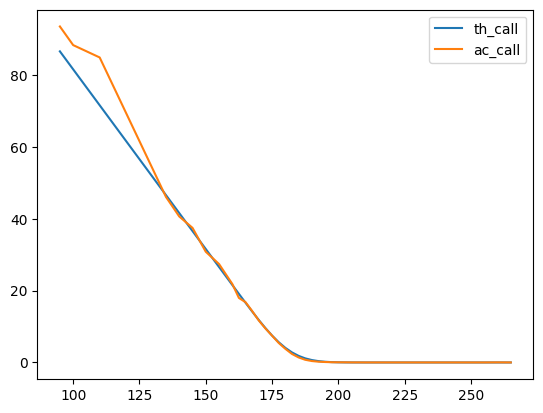

In [ ]:
call.plot() #plot actual & theoretical call price

In [ ]:
#r = risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print put price
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
95.0,3.927731e-48
100.0,3.883621e-41
105.0,5.243783e-35
110.0,1.231809e-29
115.0,6.181691e-25


In [ ]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
95.0,0.01
100.0,0.01
105.0,0.01
110.0,0.01
115.0,0.01


In [ ]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
192.5,11.315445,11.80
195.0,13.638018,13.89
197.5,16.038759,16.10
200.0,18.486584,18.95
202.5,20.960789,20.55
205.0,23.448781,23.05
210.0,28.441324,26.86
215.0,33.440149,31.88
217.5,35.940036,33.55
220.0,38.439998,36.90


<Axes: >

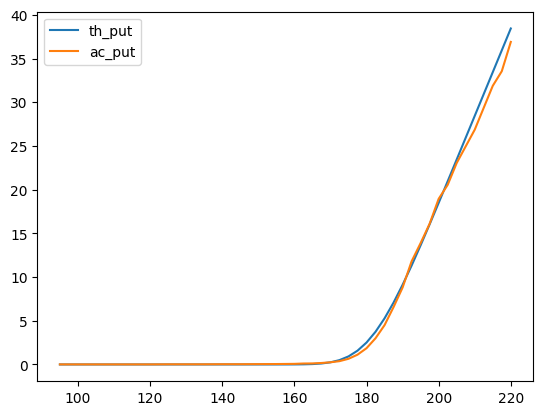

In [ ]:
put.plot()